In [1]:
import warnings

import yfinance as yf
from pandas_datareader import data as pdr

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC

In [2]:
data = pd.read_csv('500_trans_with_labels.csv')
data = data.drop(columns={'Unnamed: 0'})
data = data.rename(columns={"transaction_price": "_transaction_price", "60_days": "_60_days","120_days": "_120_days",
                    "240_days": "_240_days", "365_days": "_365_days"})
data.head()

,transaction_date,owner,ticker,asset_type,type,amount,senator,_transaction_price,_60_days,_120_days,_240_days,_365_days
0,01/05/2016,Child,NFLX,Stock,Purchase,"$1,001 - $15,000",Sheldon Whitehouse,110.450,-4.750,-25.120,14.550,41.930
1,01/14/2016,Self,MRK,Stock,Purchase,"$1,001 - $15,000",Sheldon Whitehouse,50.670,-3.055,0.318,1.975,7.882
2,01/05/2016,Spouse,CMI,Stock,Purchase,"$1,001 - $15,000",William Cassidy,90.050,5.255,2.261,33.057,55.105
3,01/05/2016,Spouse,AAPL,Stock,Purchase,"$1,001 - $15,000",William Cassidy,26.438,-0.862,-4.905,0.944,7.483
4,01/06/2016,Self,UA,Stock,Purchase,"$50,001 - $100,000",John Hoeven,41.406,-7.266,-7.516,-23.296,-26.016


In [5]:
data["perc_ret_60_days"] = round( data["_60_days"] / data['_transaction_price'],3)*100
data["perc_ret_120_days"] = round( data["_120_days"] / data['_transaction_price'],3)*100
data["perc_ret_240_days"] = round( data["_240_days"] / data['_transaction_price'],3)*100
data["perc_ret_365_days"] = round( data["_365_days"] / data['_transaction_price'],3)*100

In [6]:
data.drop(data[data['perc_ret_120_days'] > 1000].index, inplace = True)

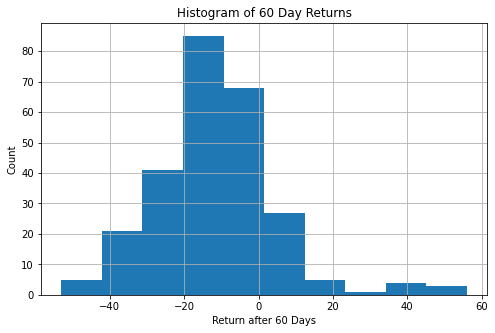

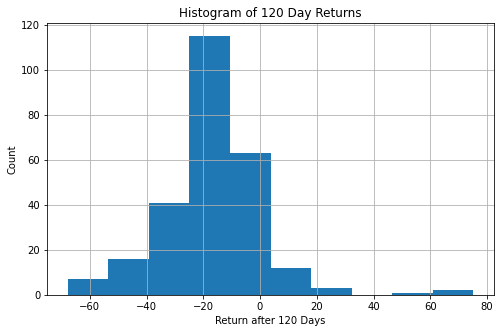

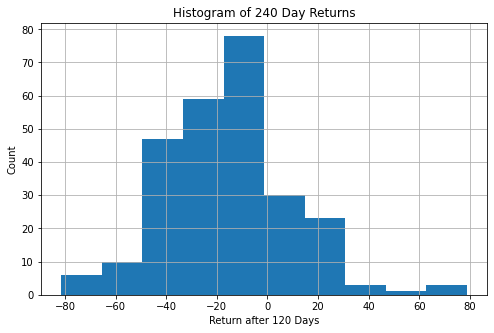

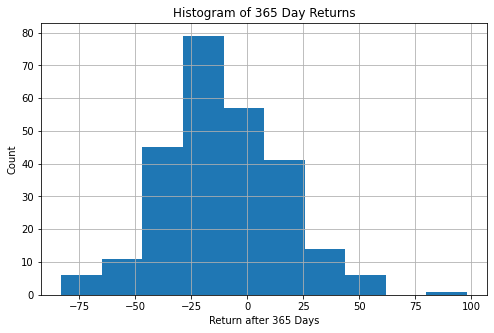

In [7]:
plt.figure(figsize = (8,5))
data.perc_ret_60_days.hist() 
plt.title('Histogram of 60 Day Returns');
plt.xlabel('Return after 60 Days');
plt.ylabel('Count');

plt.figure(figsize = (8,5))
data.perc_ret_120_days.hist() 
plt.title('Histogram of 120 Day Returns');
plt.xlabel('Return after 120 Days');
plt.ylabel('Count');

plt.figure(figsize = (8,5))
data.perc_ret_240_days.hist() 
plt.title('Histogram of 240 Day Returns');
plt.xlabel('Return after 120 Days');
plt.ylabel('Count');

plt.figure(figsize = (8,5))
data.perc_ret_365_days.hist() 
plt.title('Histogram of 365 Day Returns');
plt.xlabel('Return after 365 Days');
plt.ylabel('Count');

In [8]:
_60_day_avg = data['perc_ret_60_days'].mean()
_120_day_avg = data['perc_ret_120_days'].mean()
_240_day_avg = data['perc_ret_240_days'].mean()
_365_day_avg = data['perc_ret_365_days'].mean()

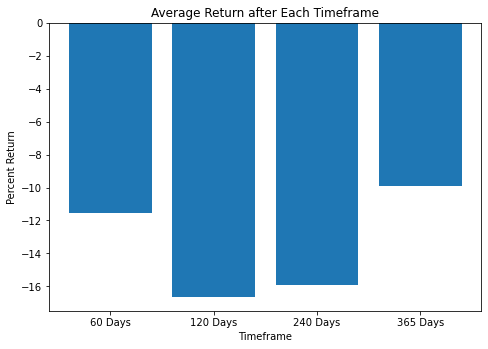

In [9]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
timeframes = ['60 Days', '120 Days', '240 Days', '365 Days']
averages = [_60_day_avg, _120_day_avg, _240_day_avg, _365_day_avg]
ax.bar(timeframes,averages)
ax.set_title('Average Return after Each Timeframe')
ax.set_xlabel('Timeframe')
ax.set_ylabel('Percent Return')
plt.show()